<a href="https://colab.research.google.com/github/suer00/PodstawyUczeniaMaszynowego_PaulinaReus/blob/main/Case_1_PaulinaRe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as scikit_learn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
#Biblioteka do undersamplingu i oversamplingu
from imblearn.under_sampling import RandomUnderSampler

from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

from scipy.stats.stats import pearsonr
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import statistics

from sklearn.decomposition import PCA

from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import math
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier



<ipython-input-1-e6858701cda5>:26: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


Wczytanie pliku i sprawdzenie liczebności klas

In [2]:

df_credit = pd.read_csv('/content/case1.csv')
df_credit.drop(df_credit.columns[1], axis=1)




,Address,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,0x0002b44ddb1476db43c868bd494422ee4c136fed,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,0x0002bda54cb772d040f779e88eb453cac0daa244,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2,12635.10,631.39,58748.48,4,13,0,11,4,0.004082,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,2.0,,GSENetwork
9837,0xff718805bb9199ebf024ab6acd333e603ad77c85,0.00,0.00,0.00,0,0,0,0,0,0.000000,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
9838,0xff8e6af02d41a576a0c82f7835535193e1a6bccc,2499.44,2189.29,261601.88,67,43,0,31,44,0.001078,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,5.0,,Free BOB Tokens - BobsRepair.com
9839,0xffde23396d57e10abf58bd929bb1e856c7718218,0.00,0.00,0.00,0,1,0,1,0,0.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Sprawdzenie warości odstających, braków danych etc

In [3]:
print(len(df_credit[df_credit['FLAG'] == 0]))
print(len(df_credit[df_credit['FLAG'] == 1]))

7662
2179


Pozbywamy się wartości pustych

In [4]:
df_credit=df_credit.dropna()


In [5]:
print(len(df_credit[df_credit['FLAG'] == 0]))
print(len(df_credit[df_credit['FLAG'] == 1]))

7631
1350


Sprawdzenie typów danych

In [6]:
df_credit.dtypes

Address                                                  object
FLAG                                                      int64
Avg min between sent tnx                                float64
Avg min between received tnx                            float64
Time Diff between first and last (Mins)                 float64
Sent tnx                                                  int64
Received Tnx                                              int64
Number of Created Contracts                               int64
Unique Received From Addresses                            int64
Unique Sent To Addresses                                  int64
min value received                                      float64
max value received                                      float64
avg val received                                        float64
min val sent                                            float64
max val sent                                            float64
avg val sent                            

Sprawdzamy jak ogolnie wyglądają poszcególne kolumny


> Już na pierwszy rzut oka widać, zę w zbiorze znajdują sie wartości odstające ( spora róznica miedzy średnią wartością a wartością min/max)



In [7]:
df_credit.describe()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,8981.000000,8981.000000,8981.000000,8.981000e+03,8981.000000,8981.000000,8981.000000,8981.000000,8981.000000,8981.000000,...,8.981000e+03,8.981000e+03,8.981000e+03,8.981000e+03,8.981000e+03,8981.0,8981.0,8981.0,8981.000000,8981.000000
mean,0.150317,5385.044197,8262.279914,2.342820e+05,122.359091,172.650150,4.068812,31.251420,26.826634,47.456209,...,1.255114e+08,4.336482e+06,1.178169e+04,1.308093e+07,6.340198e+06,0.0,0.0,0.0,1.386260,4.818283
std,0.357402,22149.013489,23416.048804,3.308771e+05,769.388029,960.891404,148.059251,301.747425,257.397328,336.858127,...,1.055557e+10,2.144761e+08,1.055384e+06,1.181940e+09,5.924963e+08,0.0,0.0,0.0,6.746451,16.696803
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.211200e+02,1.000000,2.000000,0.000000,1.000000,1.000000,0.003000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,0.000000,21.510000,753.520000,6.905013e+04,3.000000,5.000000,0.000000,2.000000,2.000000,0.100000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,0.000000,744.000000,5868.390000,3.228930e+05,13.000000,30.000000,0.000000,5.000000,3.000000,3.150000,...,9.900000e+01,2.809250e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,6711.000000,10000.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


Funkcja to wynajdywania wartości odstających

In [9]:
def find_outliers_IQR(df):
  q1=df.quantile(0.25)
  q3=df.quantile(0.75)
  IQR=q3-q1
  outliers = df[((df<(q1-2*IQR)) | (df>(q3+2*IQR)))]
  return outliers

Wyświetlenie konkretnych wartości odstających dla konkretnej kolumny (poza kolumnamy nie liczbowymi takimi jak Address, ERC20 most sent token, ERC20_most_rec_token_type , oraz wartościami które są identyfikatorami tokenów ERC20 uniq sent token name, ERC20 uniq rec token name)

In [10]:
df_credit_num =  df_credit
df_credit_num = df_credit_num.drop(['Address', 'ERC20 most sent token type', 'ERC20_most_rec_token_type', 'ERC20 uniq sent token name', 'ERC20 uniq rec token name'], axis='columns')

In [11]:
df_credit_num

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,...,0.0,0.00,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,...,0.0,0.00,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,...,0.0,0.00,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,...,0.0,0.00,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,...,0.0,0.00,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9832,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,...,0.0,0.00,1.337000e+01,6.685000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0
9836,1,12635.10,631.39,58748.48,4,13,0,11,4,0.004082,...,0.0,0.00,1.337000e+00,0.668500,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0
9837,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,...,0.0,13.37,1.337000e+01,13.370000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0
9838,1,2499.44,2189.29,261601.88,67,43,0,31,44,0.001078,...,0.0,0.00,1.500000e+03,300.693901,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0


In [12]:
j=0
for i in df_credit_num.columns:
  j= j+1

  outliers = find_outliers_IQR(df_credit_num[i])
  display(outliers)
print(j)

7663    1
7664    1
7665    1
7667    1
7668    1
       ..
9832    1
9836    1
9837    1
9838    1
9840    1
Name: FLAG, Length: 1350, dtype: int64

1        12709.07
2       246194.54
3        10219.60
5         9900.12
9         2570.59
          ...    
9813     52366.67
9816     14552.41
9836     12635.10
9838      2499.44
9840     37242.70
Name: Avg min between sent tnx, Length: 1777, dtype: float64

21       41108.66
26       60933.08
28      112602.93
31       51068.75
38       85496.60
          ...    
9424     27699.32
9475     59169.54
9497     39559.66
9542     97592.18
9798     20006.65
Name: Avg min between received tnx, Length: 1041, dtype: float64

1       1218216.73
50      1169229.50
64      1040169.40
79      1009090.55
115     1150335.93
           ...    
7506     984938.55
7556    1005197.95
7593    1125519.93
7605    1295856.85
7648    1144139.13
Name: Time Diff between first and last (Mins), Length: 505, dtype: float64

0        721
1         94
4       4598
7        213
16        57
        ... 
9690     134
9730      42
9783      49
9829      41
9838      67
Name: Sent tnx, Length: 1460, dtype: int64

0         89
11       246
23       126
34       694
35      2989
        ... 
9710     704
9730     244
9779      88
9800     771
9829     124
Name: Received Tnx, Length: 1452, dtype: int64

4       1
12      1
20      1
24      1
30      1
       ..
9602    1
9685    1
9710    1
9778    3
9800    1
Name: Number of Created Contracts, Length: 1203, dtype: int64

0         40
35      1337
48      1471
52        57
54      4848
        ... 
9800     124
9813      41
9828      45
9829     122
9838      31
Name: Unique Received From Addresses, Length: 872, dtype: int64

0       118
1        14
3        13
4        19
6        20
       ... 
9730     30
9739     34
9760     15
9829     20
9838     44
Name: Unique Sent To Addresses, Length: 1379, dtype: int64

19         44.048882
44        101.000000
51         10.000000
68         12.000000
70        103.561873
            ...     
9265       19.333221
9297       10.000000
9327       10.000000
9513       10.100000
9700    10000.000000
Name: min value received, Length: 1898, dtype: float64

3         500.000000
14       1499.999580
29       1100.000000
35       3140.999580
48        799.998740
            ...     
9154      739.000000
9441      266.000000
9679      515.221411
9700    10000.000000
9840    18998.000000
Name: max value received , Length: 791, dtype: float64

29        167.979641
44        101.000000
50        182.498725
70       1000.500000
81        110.350012
            ...     
8594    10000.000000
9079      247.456288
9154      370.350000
9700    10000.000000
9840     6333.265078
Name: avg val received, Length: 1301, dtype: float64

5        4.166800
18       3.700000
25       4.997740
42       4.500000
46       6.955496
          ...    
9751    11.524266
9819     3.477000
9822     8.284450
9824     4.537780
9828    10.000000
Name: min val sent, Length: 1198, dtype: float64

3        450.00
11       300.00
14      1100.00
29       500.00
35      3900.00
         ...   
9515     365.30
9703     300.00
9730     630.00
9813     683.65
9840    1000.00
Name: max val sent, Length: 816, dtype: float64

11      103.974875
14      102.312148
50       85.766674
70      500.249528
81      100.900740
           ...    
9378     99.664500
9396    148.590980
9703    122.344670
9813    136.741102
9840    644.427778
Name: avg val sent, Length: 562, dtype: float64

682     0.02
5763    0.01
Name: min value sent to contract, dtype: float64

682     0.020000
5763    0.010000
6777    0.046029
Name: max val sent to contract, dtype: float64

682     0.020000
5763    0.010000
6777    0.023014
Name: avg value sent to contract, dtype: float64

0        810
4       4619
7        218
11       254
34       695
        ... 
9690     296
9703     556
9710     705
9730     286
9800     772
Name: total transactions (including tnx to create contract, Length: 1124, dtype: int64

0         865.691093
3        1750.045862
11        831.799000
14       3273.988723
29       2540.083853
            ...     
9679      894.349920
9703     1835.170056
9730      784.822113
9813      683.705509
9840    11599.700000
Name: total Ether sent, Length: 1306, dtype: float64

0         586.466675
3         895.399559
11        831.803048
14       1851.006376
29       2351.714972
            ...     
9710     1213.887394
9730      783.982947
9800      496.488330
9813      683.708100
9840    18999.795230
Name: total ether received, Length: 1454, dtype: float64

682     0.020000
5763    0.010000
6777    0.046029
Name: total ether sent contracts, dtype: float64

0       -279.224419
3       -854.646303
4        -50.896986
7         -4.247902
9        -98.977000
           ...     
9800     496.488330
9807      -0.193570
9827       3.932385
9838      -8.715743
9840    7400.095233
Name: total ether balance, Length: 2818, dtype: float64

0       265.0
3        14.0
4        42.0
14       33.0
17       13.0
        ...  
9779     32.0
9792     11.0
9813     13.0
9829     22.0
9840     44.0
Name: Total ERC20 tnxs, Length: 1317, dtype: float64

0       3.558854e+07
1       4.034283e+02
2       5.215121e+02
3       1.711105e+04
4       1.628297e+05
            ...     
9801    3.395081e+02
9813    1.634873e+04
9829    1.272317e+04
9838    1.503470e+03
9840    6.007075e+04
Name: ERC20 total Ether received, Length: 1979, dtype: float64

0       3.560317e+07
1       2.260809e+00
3       1.141223e+04
4       1.235399e+05
14      1.330865e+05
            ...     
9778    1.120000e+11
9800    2.000000e+02
9813    1.564402e+04
9824    1.000000e+02
9829    2.600010e+02
Name: ERC20 total ether sent, Length: 1547, dtype: float64

378     1.150000e-14
472     1.870000e-10
566     2.143675e+05
1056    3.150000e-08
1057    1.060000e-12
1427    1.680000e-02
2272    2.000000e-06
2552    2.200000e-04
2768    2.327219e+02
3577    4.987702e-03
3631    2.720000e-06
3850    4.014975e+03
3872    5.040000e-07
3914    4.392710e+02
4843    5.570000e-05
5232    5.320000e-07
5385    9.748780e+01
6166    3.915000e+03
6257    3.453885e+05
6404    1.260000e-07
6554    2.860000e-13
6561    1.010000e-06
6572    1.520679e+04
7561    3.860000e-06
7715    2.190000e+01
9042    6.300000e-16
9493    4.160000e+05
9598    1.000000e+02
Name: ERC20 total Ether sent contract, dtype: float64

0       30.0
1        1.0
3        2.0
4        4.0
14       4.0
        ... 
9778     1.0
9800     2.0
9813     1.0
9824     1.0
9829    13.0
Name: ERC20 uniq sent addr, Length: 1547, dtype: float64

0       54.0
2        7.0
3       11.0
4       23.0
11       7.0
        ... 
9747    35.0
9779    24.0
9792     8.0
9813     9.0
9840    37.0
Name: ERC20 uniq rec addr, Length: 1217, dtype: float64

378     1.0
472     1.0
566     1.0
1056    1.0
1057    1.0
1427    1.0
2272    1.0
2552    3.0
2768    1.0
3577    1.0
3631    1.0
3850    1.0
3872    1.0
3914    1.0
4843    1.0
5232    1.0
5385    1.0
6166    1.0
6257    1.0
6404    1.0
6554    1.0
6561    2.0
6572    1.0
7561    1.0
7715    1.0
9042    1.0
9493    1.0
9598    1.0
Name: ERC20 uniq sent addr.1, dtype: float64

0       58.0
1        7.0
2        8.0
3       11.0
4       27.0
        ... 
9779    23.0
9792    11.0
9813    10.0
9829     8.0
9840    42.0
Name: ERC20 uniq rec contract addr, Length: 1303, dtype: float64

Series([], Name: ERC20 avg time between sent tnx, dtype: float64)

Series([], Name: ERC20 avg time between rec tnx, dtype: float64)

Series([], Name: ERC20 avg time between rec 2 tnx, dtype: float64)

Series([], Name: ERC20 avg time between contract tnx, dtype: float64)

9       600.000000
12        0.075367
20        2.000000
24        0.920501
30        0.105870
           ...    
9825     13.370000
9827     13.370000
9828     15.000000
9830      2.267779
9837     13.370000
Name: ERC20 min val rec, Length: 2163, dtype: float64

0       1.500000e+07
1       3.650000e+02
2       4.428198e+02
3       1.141223e+04
4       9.000000e+04
            ...     
9801    3.009797e+02
9813    1.367416e+04
9829    7.591895e+03
9838    1.500000e+03
9840    2.018061e+04
Name: ERC20 max val rec, Length: 1956, dtype: float64

0       265586.147600
3         1555.550174
4         4934.232147
9          600.000000
11         774.128239
            ...      
9813      1634.872699
9824        99.000000
9829      1590.395848
9838       300.693901
9840      1365.244359
Name: ERC20 avg val rec, Length: 1886, dtype: float64

1       2.260809e+00
3       1.000000e+02
14      1.000000e-06
17      1.620000e+03
23      1.000000e+02
            ...     
9778    1.000000e+08
9800    1.000000e+02
9813    7.236008e+01
9824    1.000000e+02
9829    1.000000e-03
Name: ERC20 min val sent, Length: 753, dtype: float64

0       1.683100e+07
1       2.260809e+00
3       9.029231e+03
4       4.500000e+04
14      1.183245e+05
            ...     
9778    1.120000e+11
9800    1.000000e+02
9813    1.367416e+04
9824    1.000000e+02
9829    2.000000e+01
Name: ERC20 max val sent, Length: 1460, dtype: float64

0       2.717799e+05
1       2.260809e+00
3       3.804077e+03
4       1.372666e+04
14      2.661730e+04
            ...     
9778    5.614756e+10
9800    1.000000e+02
9813    5.214673e+03
9824    1.000000e+02
9829    1.857150e+01
Name: ERC20 avg val sent, Length: 1451, dtype: float64

Series([], Name: ERC20 min val sent contract, dtype: float64)

Series([], Name: ERC20 max val sent contract, dtype: float64)

Series([], Name: ERC20 avg val sent contract, dtype: float64)

44


Za dużo mamy wartości odstających, aby je poprostu usunąć, dlatego też przedstawiam dane za pomocą boxplotów, aby za pomocą metody ekspercji zbadać wartości odstające i możliwe usunąć te najbardzie odstajace

<ipython-input-13-ab23ff84954a>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


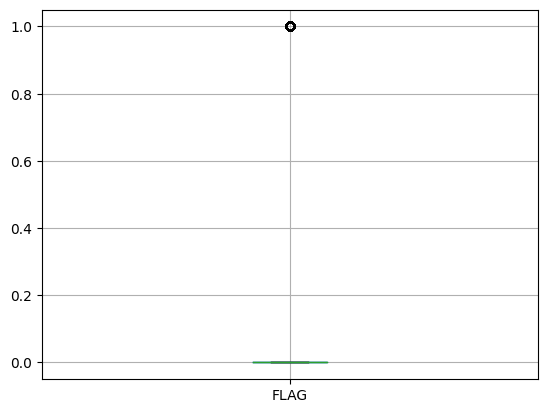

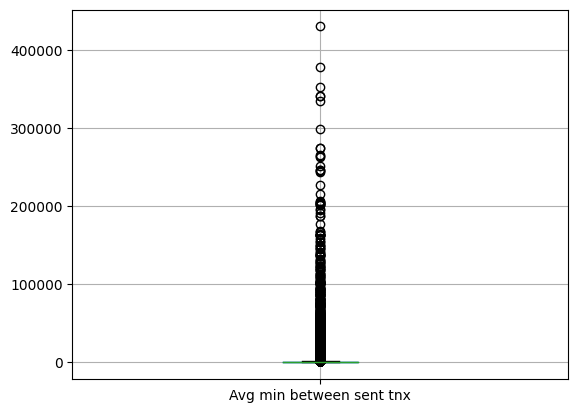

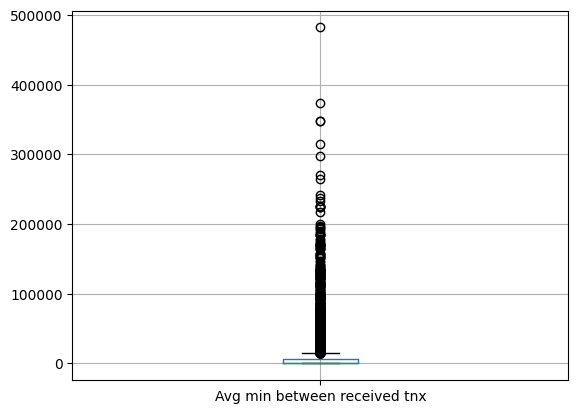

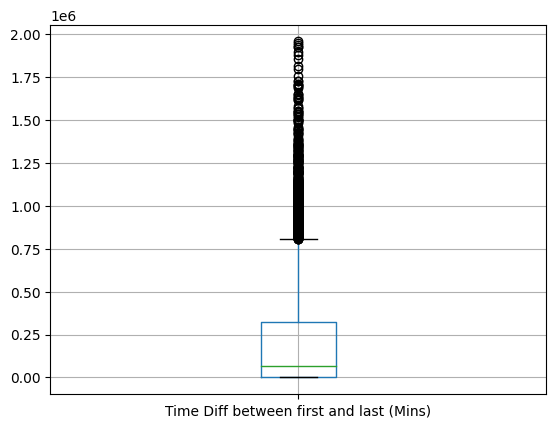

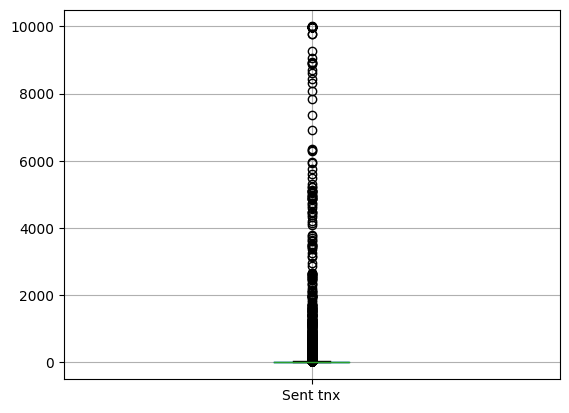

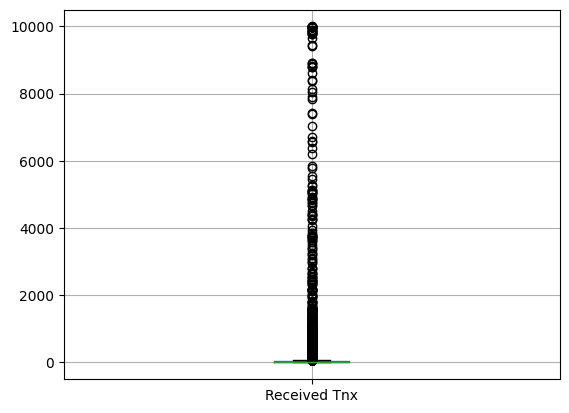

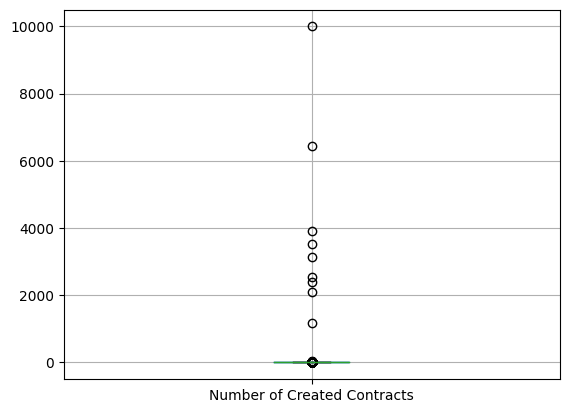

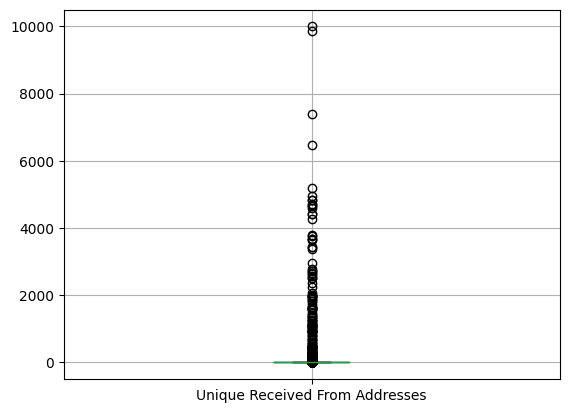

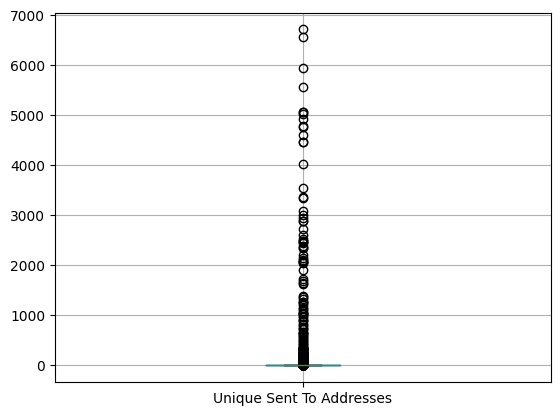

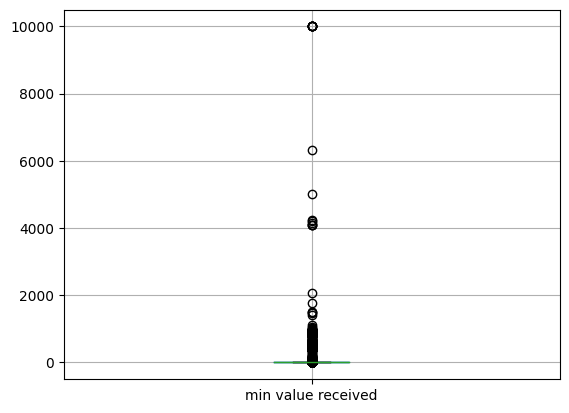

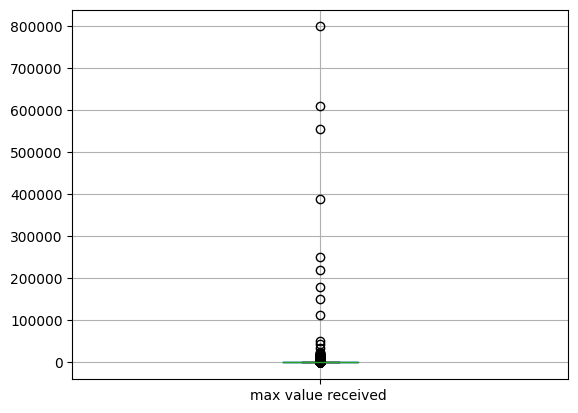

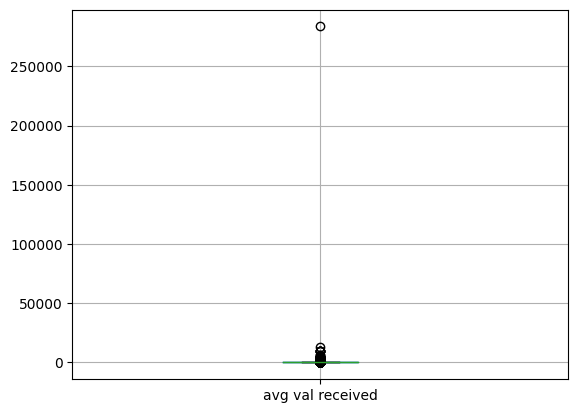

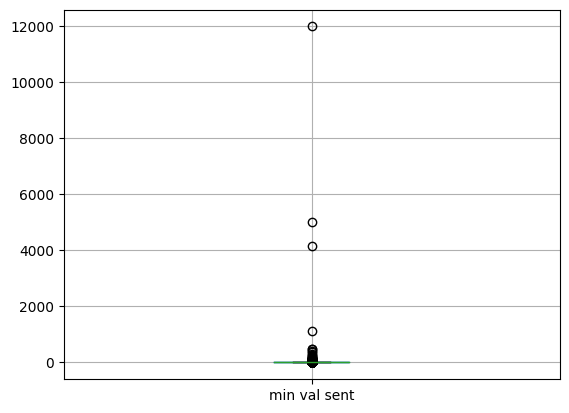

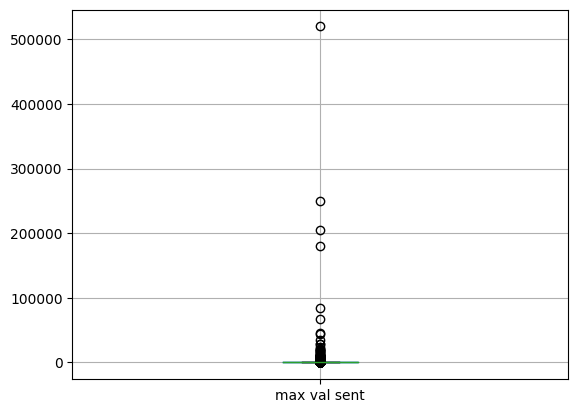

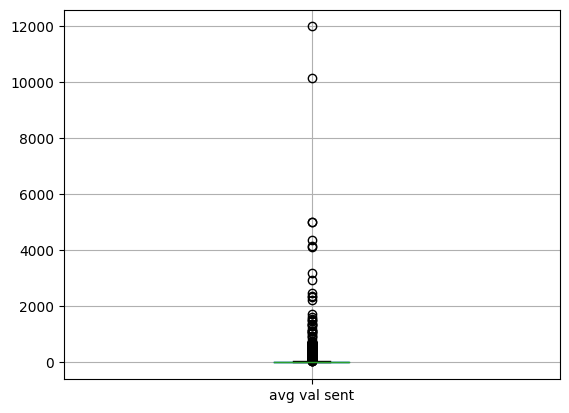

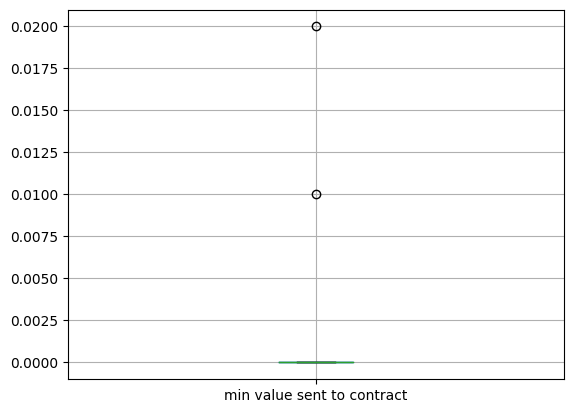

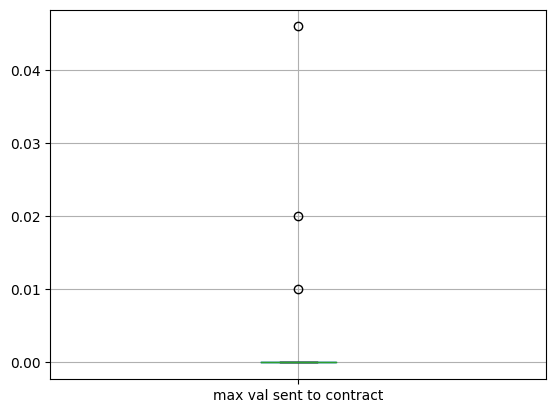

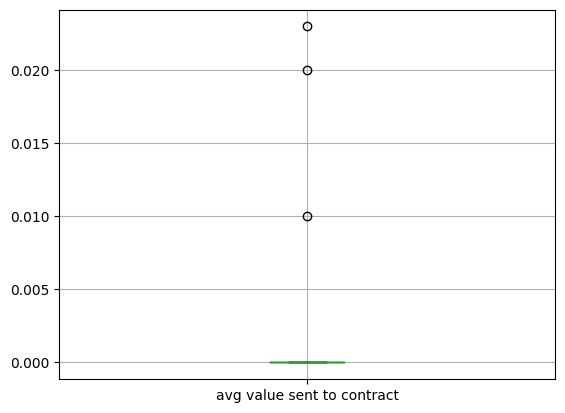

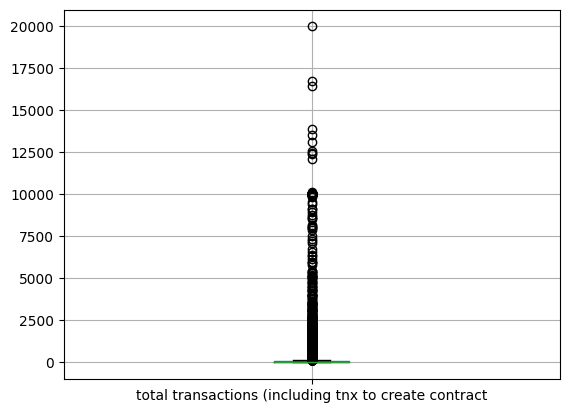

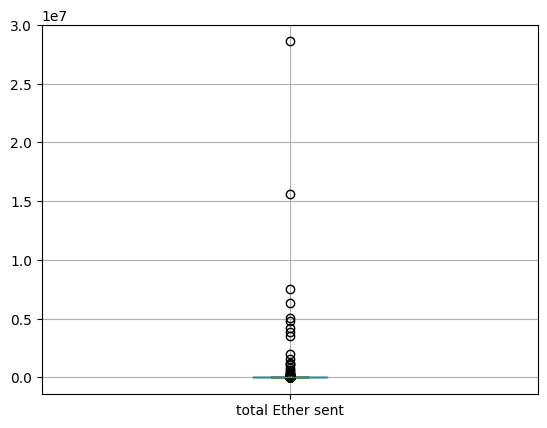

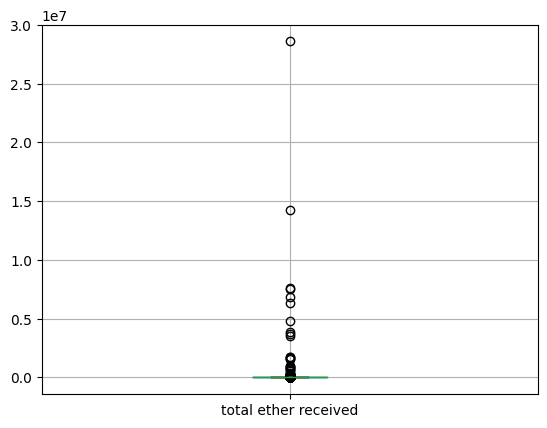

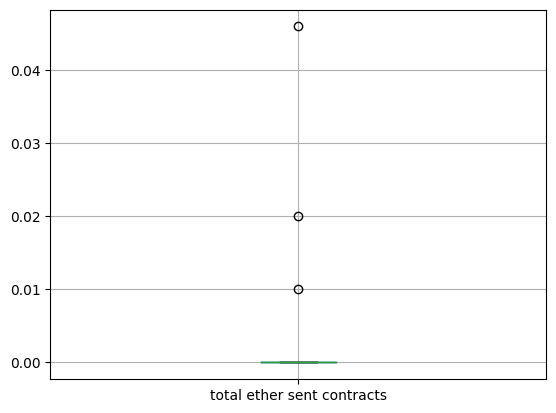

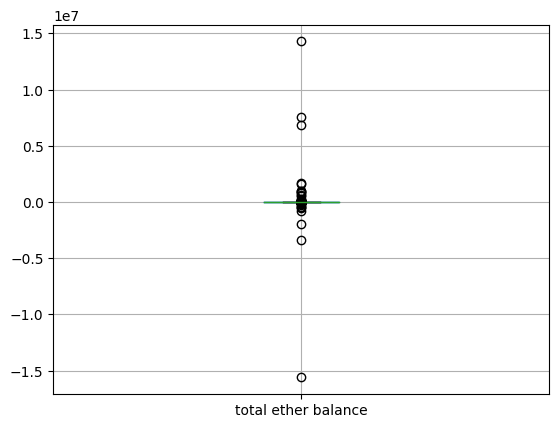

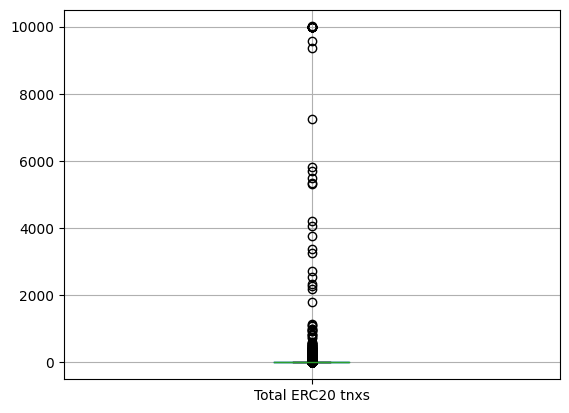

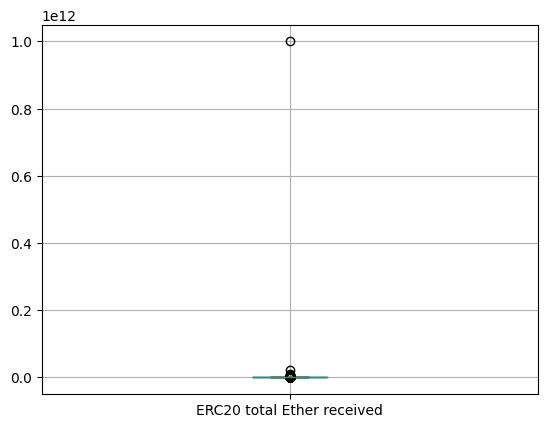

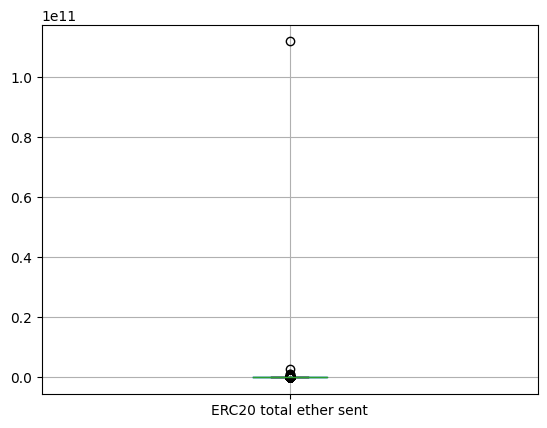

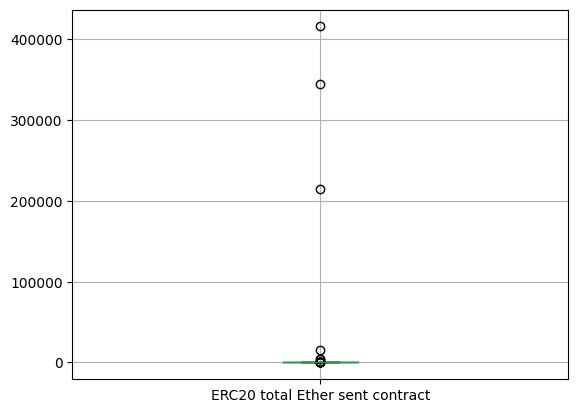

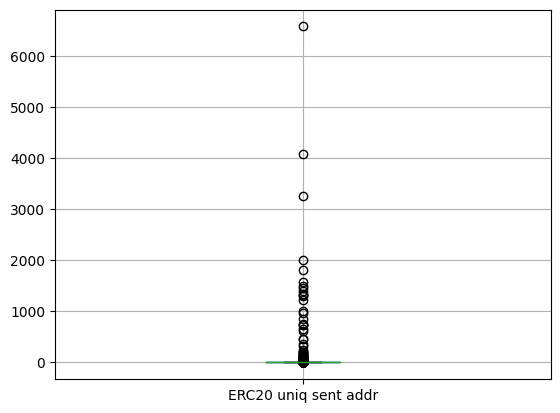

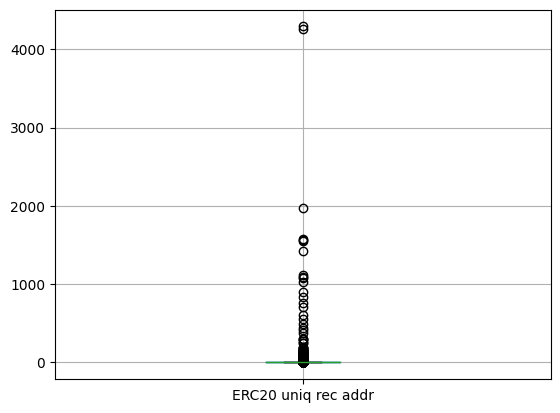

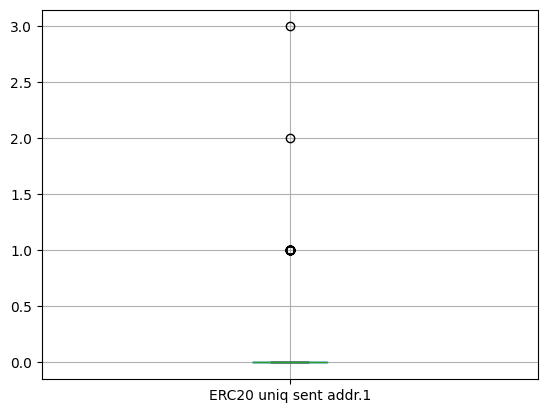

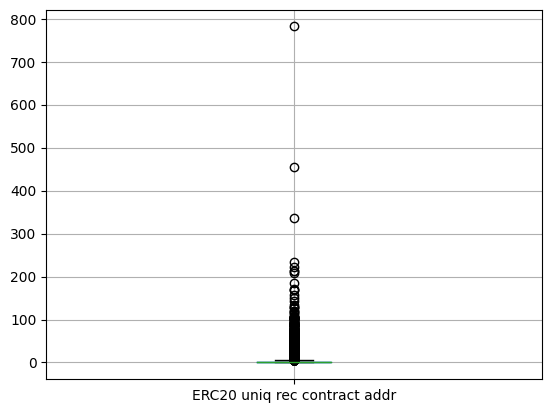

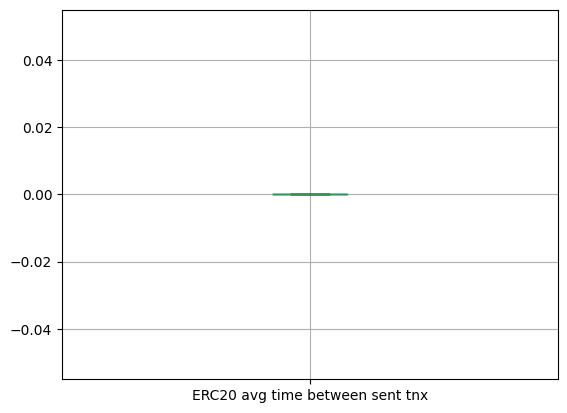

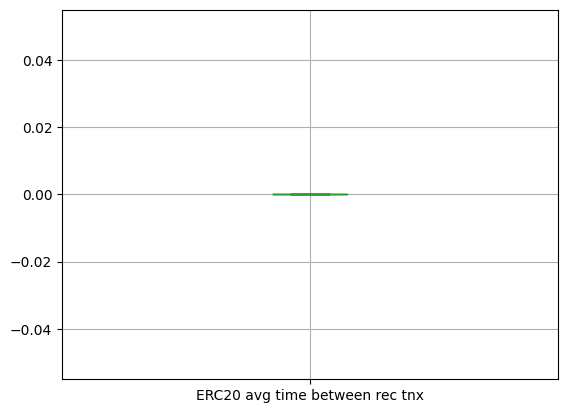

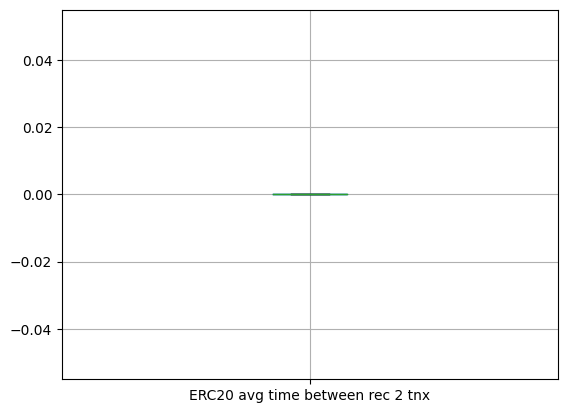

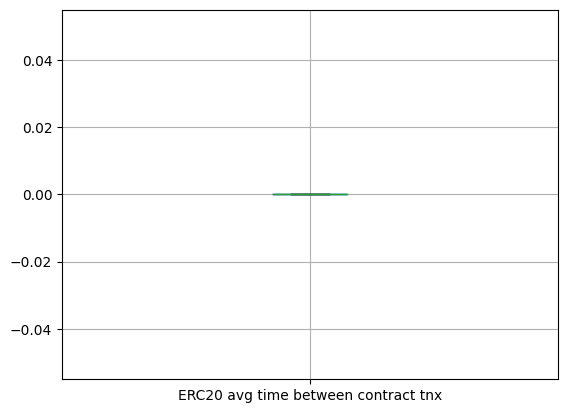

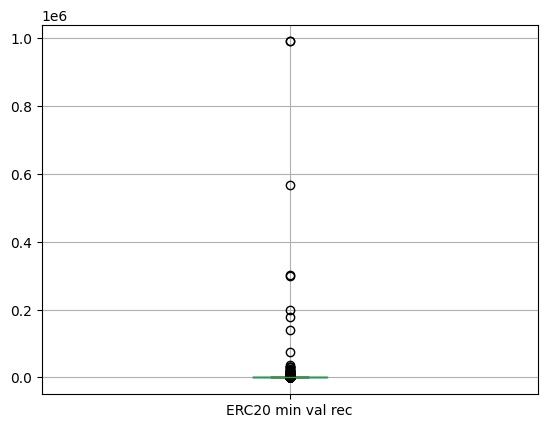

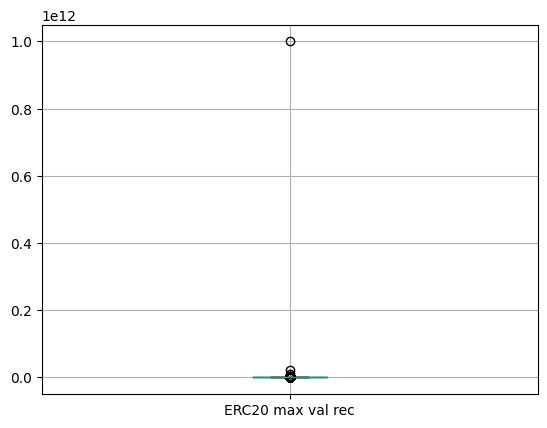

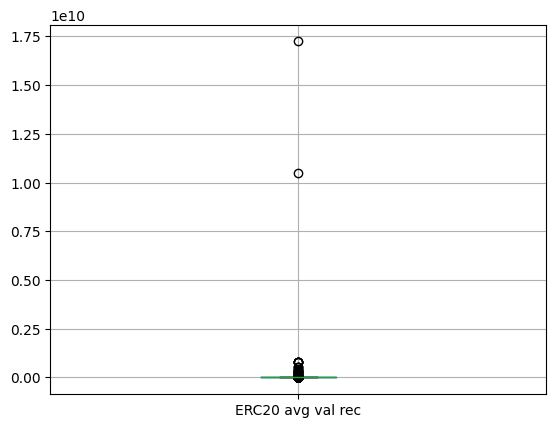

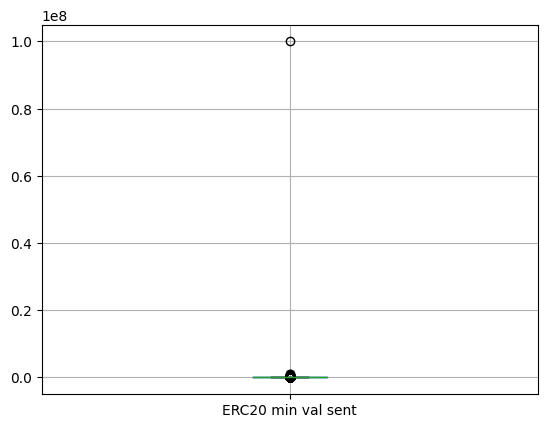

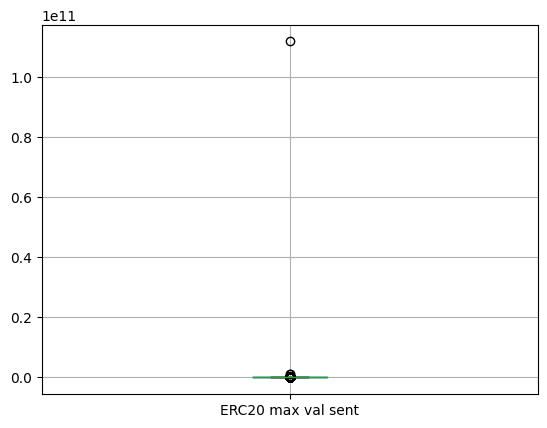

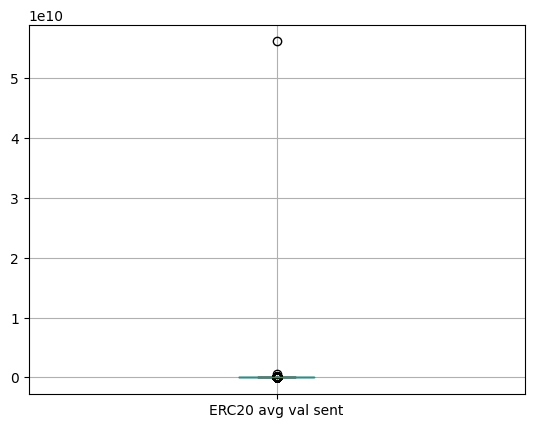

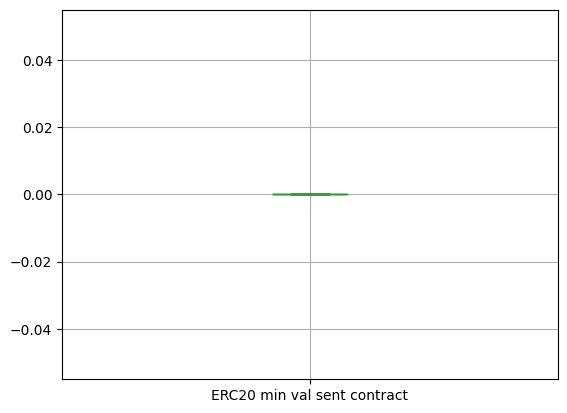

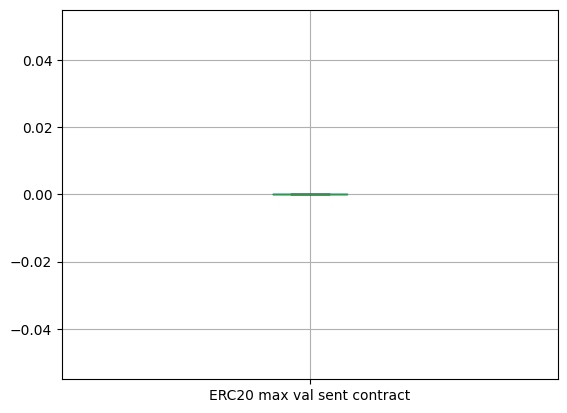

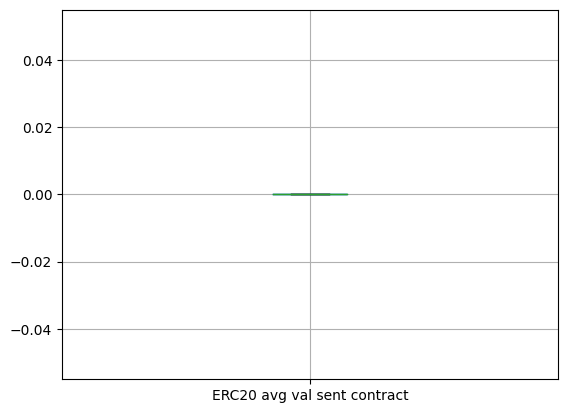

In [13]:

for column in df_credit_num:
    plt.figure()
    df_credit_num.boxplot([column])

Wartości które należy uregolować ponieważ znajdują sie w nich pojedyńcze wartości odstające
*   Avg min between sent tnx <300000
*   Avg min between received tnx <300000
*   Number of Created Contracts <4000
*   Unique Received From Addresses <6000
*   Unique Sent To Addresses <4000
*   min value received <6000
*   max value received <300000
*   min val sent <2000
*   max val sent <100000
*   avg val sent <4000
*   min value sent to contract <0.0025
*   max value sent to contract <0.01
*   avg value sent to contract <0.005
*   total transactions (including tnx to create contact) <12500
*   total Ether sent <1
*   total ether received <0.5
*   total ether sent contracts <0.01
*   -0.5<<total ether balance <0.5
*   Total ERC20 tnxs <6000
*   ERC20 total Ether received <0.2
*   ERC20 total ether sent <0.2
*   ERC20 total Ether sent contract <100000
*   ERC20 uniq sent addr <3000
*   ERC20 uniq rec addr <2000
*   ERC20 uniq sent addr.1 <0.5
*   ERC20 uniq rec contract addr <300
*   ERC20 min val rec <0.2
*   ERC20 max val rec <0.2
*   ERC20 avg val rec <0.25
*   ERC20 min val sent<0.2
*   ERC20 max val sent<1


In [ ]:

def reduce_values(value):
    if isinstance(value, str):  # Sprawdzenie czy wartość jest typu str
        if "<" in value:
            parts = value.split("<")
            if parts[0].strip().isdigit():
                return "<" + str(int(parts[0].strip()) // 2)
            else:
                return "<" + parts[1].strip()
        elif "<<" in value:
            parts = value.split("<<")
            if parts[1].strip().isdigit():
                return "-" + str(int(parts[1].strip()) // 2) + "<<" + str(int(parts[1].strip()) // 2)
            else:
                return value
        elif ">" in value:
            parts = value.split(">")
            if parts[0].strip().isdigit():
                return ">" + str(int(parts[0].strip()) // 2)
            else:
                return ">" + parts[1].strip()
    return value

Zastosowanie wszytskich ograniczeń doprowadzi do usunięcia większości rekordów dlatego też decyduję się zastosować ograniczenie konkretnych kolumn, po przeprowadzeniu oszacowania ile wierszy zostanie usuniętych przy kokretnych ograniczeniach

In [14]:

columns = {
    "Avg min between sent tnx": "<300000",
    "Number of Created Contracts": "<4000",
    "total Ether sent": "<1",
    "Total ERC20 tnxs": "<6000",
    "ERC20 total Ether received": "<0.2",
    "Avg min between sent tnx": "<300000",
    "Avg min between sent tnx": "<300000",
    "Avg min between received tnx": "<300000",
    "Number of Created Contracts": "<4000",
    "Unique Received From Addresses": "<6000",
    "Unique Sent To Addresses": "<4000",
    "min value received": "<6000",
    "max value received": "<300000",
    "min val sent": "<2000",
    "max val sent": "<100000",
    "avg val sent": "<4000",
    "min value sent to contract": "<0.0025",
    "max value sent to contract": "<0.01",
    "avg value sent to contract": "<0.005",
    "total transactions (including tnx to create contact)": "<12500",
    "total Ether sent": "<1",
    "total ether received": "<0.5",
    "total ether sent contracts": "<0.01",
    "total ether balance": "<0.5",
    "total ether balance": ">-0.5",
    "Total ERC20 tnxs": "<6000",
    "ERC20 total Ether received": "<0.2",
    "ERC20 total ether sent": "<0.2",
    "ERC20 total Ether sent contract": "<100000",
    "ERC20 uniq sent addr": "<3000",
    "ERC20 uniq rec addr": "<2000",
    "ERC20 uniq sent addr.1": "<0.5",
    "ERC20 uniq rec contract addr": "<300",
    "ERC20 min val rec": "<0.2",
    "ERC20 max val rec": "<0.2",
    "ERC20 avg val rec": "<0.25",
    "ERC20 min val sent": "<0.2",
    "ERC20 max val sent": "<1"
}

df_credit_num = df_credit_num.drop(df_credit_num[df_credit_num["Avg min between sent tnx"]>300000].index)
df_credit_num = df_credit_num.drop(df_credit_num[df_credit_num["Number of Created Contracts"]>4000].index)
# df_credit_num = df_credit_num.drop(df_credit_num[df_credit_num["total Ether sent"]>2].index)
df_credit_num = df_credit_num.drop(df_credit_num[df_credit_num["Total ERC20 tnxs"]>6000].index)
# df_credit_num = df_credit_num.drop(df_credit_num[df_credit_num["ERC20 total Ether received"]>0.2].index)
df_credit_num = df_credit_num.drop(df_credit_num[df_credit_num["Avg min between sent tnx"]>300000].index)
df_credit_num = df_credit_num.drop(df_credit_num[df_credit_num["Avg min between received tnx"]>300000].index)
df_credit_num = df_credit_num.drop(df_credit_num[df_credit_num["Number of Created Contracts"]>4000].index)
df_credit_num = df_credit_num.drop(df_credit_num[df_credit_num["Unique Received From Addresses"]>6000].index)
df_credit_num = df_credit_num.drop(df_credit_num[df_credit_num["Unique Sent To Addresses"]>4000].index)
df_credit_num = df_credit_num.drop(df_credit_num[df_credit_num["min value received"]>6000].index)
# df_credit_num = df_credit_num.drop(df_credit_num[df_credit_num["max value received"]>300000].index)
df_credit_num = df_credit_num.drop(df_credit_num[df_credit_num["min val sent"]>2000].index)
df_credit_num = df_credit_num.drop(df_credit_num[df_credit_num["max val sent"]>100000].index)
df_credit_num = df_credit_num.drop(df_credit_num[df_credit_num["avg val sent"]>4000].index)
df_credit_num = df_credit_num.drop(df_credit_num[df_credit_num["min value sent to contract"]>0.0025].index)
# df_credit_num = df_credit_num.drop(df_credit_num[df_credit_num["max value sent to contract"]>0.01].index)
df_credit_num = df_credit_num.drop(df_credit_num[df_credit_num["avg value sent to contract"]>0.005].index)
# df_credit_num = df_credit_num.drop(df_credit_num[df_credit_num["total transactions (including tnx to create contact)"]>12500].index)
# df_credit_num = df_credit_num.drop(df_credit_num[df_credit_num["total Ether sent"]>2].index)
# df_credit_num = df_credit_num.drop(df_credit_num[df_credit_num["total ether received"]>0.5].index)
df_credit_num = df_credit_num.drop(df_credit_num[df_credit_num["total ether sent contracts"]>0.01].index)
df_credit_num = df_credit_num.drop(df_credit_num[df_credit_num["total ether balance"]>0.5].index)
df_credit_num = df_credit_num.drop(df_credit_num[df_credit_num["total ether balance"]<-0.5].index)
df_credit_num = df_credit_num.drop(df_credit_num[df_credit_num["Total ERC20 tnxs"]>6000].index)
# df_credit_num = df_credit_num.drop(df_credit_num[df_credit_num["ERC20 total Ether received"]>0.2].index)
df_credit_num = df_credit_num.drop(df_credit_num[df_credit_num["ERC20 total ether sent"]>0.2].index)
df_credit_num = df_credit_num.drop(df_credit_num[df_credit_num["ERC20 total Ether sent contract"]>100000].index)
df_credit_num = df_credit_num.drop(df_credit_num[df_credit_num["ERC20 uniq sent addr"]>3000].index)
df_credit_num = df_credit_num.drop(df_credit_num[df_credit_num["ERC20 uniq rec addr"]>2000].index)
df_credit_num = df_credit_num.drop(df_credit_num[df_credit_num["ERC20 uniq sent addr.1"]>0.5].index)
df_credit_num = df_credit_num.drop(df_credit_num[df_credit_num["ERC20 uniq rec contract addr"]>300].index)
# df_credit_num = df_credit_num.drop(df_credit_num[df_credit_num["ERC20 min val rec"]>0.2].index)
# df_credit_num = df_credit_num.drop(df_credit_num[df_credit_num["ERC20 max val rec"]>0.2].index)
# df_credit_num = df_credit_num.drop(df_credit_num[df_credit_num["ERC20 avg val rec"]>0.25].index)
# df_credit_num = df_credit_num.drop(df_credit_num[df_credit_num["ERC20 min val sent"]>0.2].index)
# df_credit_num = df_credit_num.drop(df_credit_num[df_credit_num["ERC20 max val sent"]>1].index)


In [15]:
def reduce_values(value):

    return value


In [16]:
df_credit_num = df_credit_num.applymap(reduce_values)


Ostatecznie po usunięciu wartości odstających otrzymujemy:


*   4795
*   1033



In [17]:
print(len(df_credit_num[df_credit_num['FLAG'] == 0]))
print(len(df_credit_num[df_credit_num['FLAG'] == 1]))

4795
1033


Przeprowadzamy standaryzajcje ze względu na to, iz jest ona mniej wrażliwa na wartości odstające które mimo czyszczenia danych wciąż są obecne w zbiorze

In [18]:

for i in df_credit_num.columns:
  if i == 'FLAG':
    pass
  else:
    df_credit_num[i] = (df_credit_num[i] - df_credit_num[i].mean()) / df_credit_num[i].std()
    df_credit_num[i] = df_credit_num[i].fillna(0)

data_standardised = df_credit_num.copy()


In [19]:
data_standardised

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract
2,0,11.751752,-0.209410,1.531164,-0.146905,-0.091680,-0.063487,0.035310,-0.084785,-0.280831,...,0.0,-0.023682,-0.034743,-0.031040,-0.03367,-0.033701,-0.033673,0.0,0.0,0.0
5,0,0.269834,-0.297343,-0.431676,-0.146905,-0.114276,-0.063487,-0.045296,-0.124388,-0.277891,...,0.0,-0.023682,-0.034751,-0.031044,-0.03367,-0.033701,-0.033673,0.0,0.0,0.0
6,0,-0.207853,-0.286495,-0.480237,0.027381,-0.088452,-0.063487,0.025234,0.628069,-0.281139,...,0.0,-0.023682,-0.034751,-0.031044,-0.03367,-0.033701,-0.033673,0.0,0.0,0.0
8,0,-0.211229,-0.313382,-0.512557,-0.154483,-0.120732,-0.063487,-0.055372,-0.124388,-0.271753,...,0.0,-0.023682,-0.034751,-0.031044,-0.03367,-0.033701,-0.033673,0.0,0.0,0.0
10,0,-0.209652,0.238580,-0.001684,-0.086284,-0.091680,-0.063487,-0.045296,-0.124388,-0.276564,...,0.0,-0.023682,-0.034751,-0.031044,-0.03367,-0.033701,-0.033673,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9828,1,-0.203973,-0.307832,-0.486877,-0.124172,0.030986,-0.063487,0.387964,-0.005579,-0.281307,...,0.0,-0.021922,-0.034751,-0.031043,-0.03367,-0.033701,-0.033673,0.0,0.0,0.0
9830,1,-0.211229,-0.309761,-0.408603,-0.154483,-0.098136,-0.063487,0.015159,-0.124388,-0.281235,...,0.0,-0.023416,-0.034751,-0.031044,-0.03367,-0.033701,-0.033673,0.0,0.0,0.0
9832,1,-0.211229,-0.313382,-0.514523,-0.162060,-0.123960,-0.063487,-0.065448,-0.163991,-0.281375,...,0.0,-0.023682,-0.034751,-0.031043,-0.03367,-0.033701,-0.033673,0.0,0.0,0.0
9836,1,0.402731,-0.286412,-0.281942,-0.131750,-0.081996,-0.063487,0.045386,-0.005579,-0.281355,...,0.0,-0.023682,-0.034751,-0.031044,-0.03367,-0.033701,-0.033673,0.0,0.0,0.0


Szukamy najmniejszych korelacji w celu ich usunięcia



*    W zbiorze niestety można zobserwować niewiele korelacji






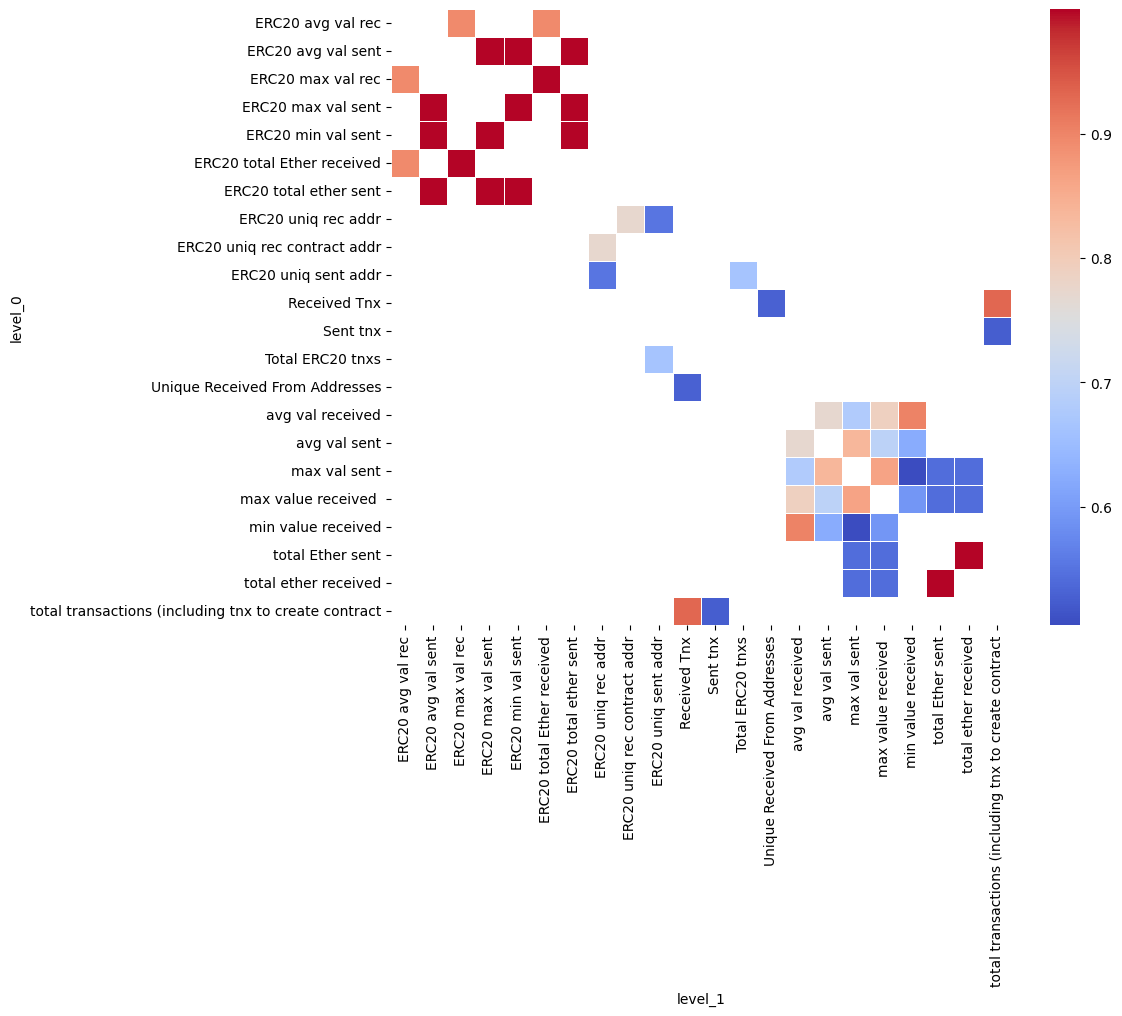

In [20]:
def corr_simple(data, sig=0.5):

    df_cor = data.apply(lambda x: pd.factorize(x)[0] if pd.api.types.is_string_dtype(x) else x)
    corr = df_cor.corr()
    np.fill_diagonal(corr.values, np.nan)

#We don't consider the "perfect" correlation equals 1
    corr = corr.mask(corr == 1)
    corr = corr.stack().reset_index()


    corr = corr[abs(corr[0]) > sig]

    # Sort
    corr = corr.iloc[abs(corr[0]).argsort()[::-1]]

    #print(corr)


    plt.figure(figsize=(10, 8))
    sns.heatmap(corr.pivot(index='level_0', columns='level_1', values=0), annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.show()


corr_simple(data_standardised)


In [21]:
correlation={}
for x in data_standardised.columns:
  correlation.update({x:abs(data_standardised['FLAG'].corr(data_standardised[x]))})


Badamy i przedstawiamy ogólną korelację dla poszczególnych zmiennych następnie przedstawiamy ją na wykresie

In [22]:

sort_orders = sorted(correlation.items(), key=lambda x: x[1], reverse=True)

for i in sort_orders:
	print(i[0], i[1])

FLAG 1.0
avg val sent 0.14541903626832556
Time Diff between first and last (Mins) 0.1421305296178317
avg val received 0.1389192799348336
max val sent 0.12962411985770206
min value received 0.1275485480969268
max value received  0.11571726340091261
Avg min between received tnx 0.11464117754256328
Sent tnx 0.06480335876889155
min val sent 0.047355027649607785
Received Tnx 0.04459027402637353
Unique Sent To Addresses 0.034711319380930535
Number of Created Contracts 0.017424996339079877
min value sent to contract nan
max val sent to contract nan
avg value sent to contract nan
total ether sent contracts nan
total ether balance 0.1189095012543062
ERC20 total Ether sent contract nan
ERC20 uniq sent addr.1 nan
ERC20 uniq rec contract addr 0.18791594270464929
ERC20 uniq rec addr 0.15950254119984242
total transactions (including tnx to create contract 0.06246489634673406
total ether received 0.04008917183844916
ERC20 avg time between sent tnx nan
ERC20 avg time between rec tnx nan
ERC20 avg time

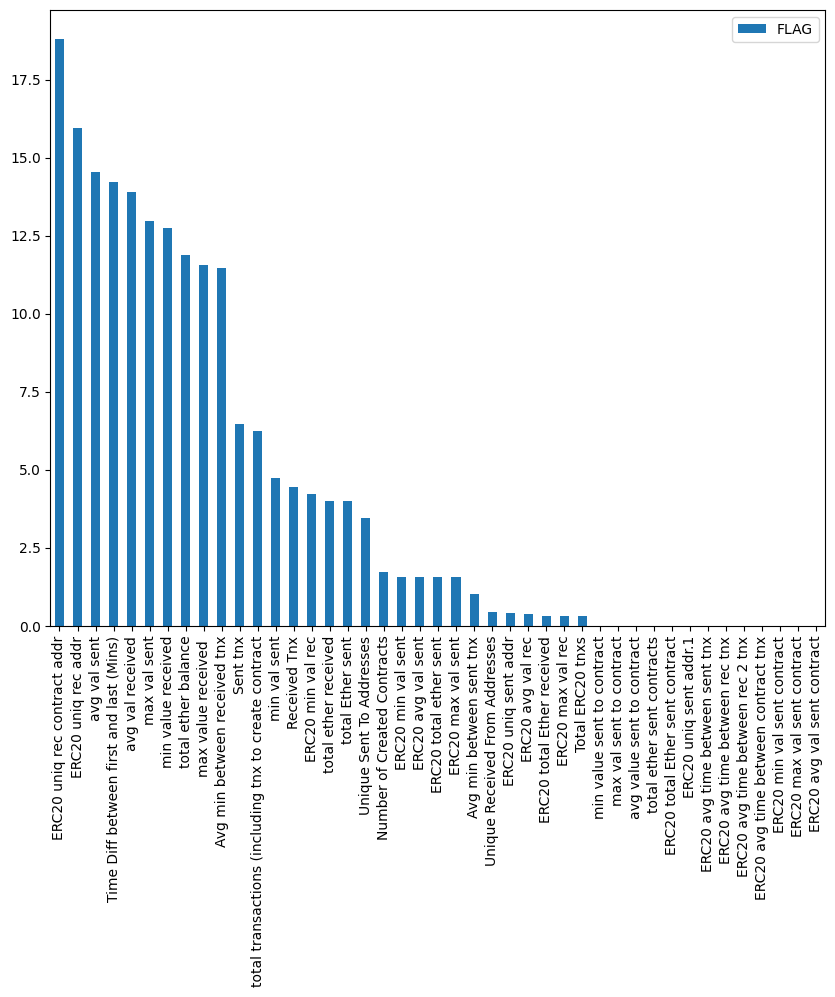

In [23]:
wykres =pd.DataFrame(abs(data_standardised.corr()['FLAG'].drop('FLAG')*100).sort_values(
ascending=False)).plot.bar(figsize = (10,8))

Usuwamy kolumny których ogólna korelacja wzniosa poniej 0.1

In [24]:
sort_orders= dict(sort_orders)
keys_to_drop=[]

for k in sort_orders.keys():
  if sort_orders.get(k) <= 0.1:
    keys_to_drop.append(k)
keys_to_drop

['Sent tnx',
 'min val sent',
 'Received Tnx',
 'Unique Sent To Addresses',
 'Number of Created Contracts',
 'total transactions (including tnx to create contract',
 'total ether received',
 'ERC20 min val rec',
 'total Ether sent',
 'ERC20 min val sent',
 'ERC20 avg val sent',
 'ERC20 total ether sent',
 'ERC20 max val sent',
 'Avg min between sent tnx',
 'Unique Received From Addresses',
 'ERC20 uniq sent addr',
 'ERC20 avg val rec',
 'ERC20 total Ether received',
 'ERC20 max val rec',
 'Total ERC20 tnxs']

Biorąc pod uwage jedynie kolumny których korelacja jest większa niż 0.1
(mimo nistkiej korelacji wśród zmiennych) stosujemy metodę PCA w celu zmiejszenia ilości wymiarów. PCA w przypadku niskiej korelcji utworzy wielenie zmiennych opisowych

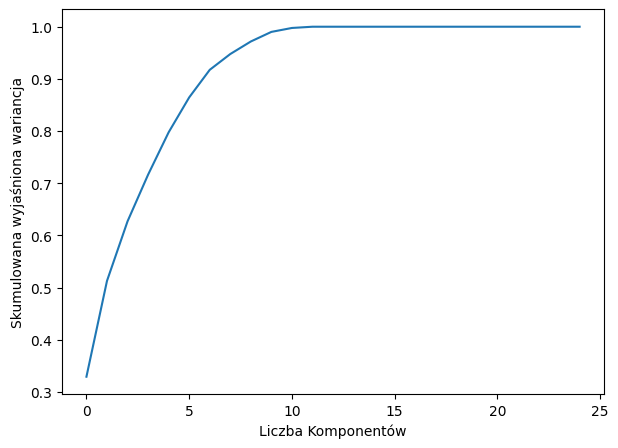

          0         1         2         3         4         5         6  \
0 -0.961524  3.674216  1.778483  1.261267 -0.813583 -0.547144 -0.367742   
1 -0.554810 -0.717089  0.259066 -0.119683  0.030072  0.033914  0.090228   
2 -0.593862 -0.654768  0.179149 -0.318736 -0.112306 -0.065122  0.077238   
3 -0.566793 -0.760111  0.290688 -0.161870 -0.079600  0.033615  0.071712   
4 -0.657097 -0.395241 -0.318615  0.073828 -0.076611  0.102997  0.014348   

          7         8  
0 -0.950585 -0.310356  
1  0.016545  0.110786  
2  0.152030  0.128233  
3  0.062014  0.121445  
4  0.029239  0.079388  


In [28]:
exclude_filter = ~data_standardised.columns.isin(['FLAG','Address', 'ERC20 most sent token type', 'ERC20_most_rec_token_type', 'ERC20 uniq sent token name', 'ERC20 uniq rec token name','Sent tnx',
 'min val sent'
 'Received Tnx',
 'Unique Sent To Addresses',
 'Number of Created Contracts',
 'total transactions (including tnx to create contract',
 'total ether received',
 'ERC20 min val rec',
 'total Ether sent',
 'ERC20 min val sent',
 'ERC20 avg val sent',
 'ERC20 total ether sent',
 'ERC20 max val sent',
 'Avg min between sent tnx',
 'Unique Received From Addresses',
 'ERC20 uniq sent addr',
 'ERC20 avg val rec',
 'ERC20 total Ether received',
 'ERC20 max val rec',
 'Total ERC20 tnxs'])

pca = PCA().fit(data_standardised.loc[:, exclude_filter])
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Liczba Komponentów')
plt.ylabel('Skumulowana wyjaśniona wariancja')
plt.gcf().set_size_inches(7, 5)
plt.show()

pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(data_standardised.loc[:, exclude_filter])
principal_df = pd.DataFrame(data=principal_components)

print(principal_df.head())


Na wykresie widać, że 9 z czynników może wyjaśnić ponad 95% całkowitej wariancji

In [29]:
exclude_filter = ~data_standardised.columns.isin(['FLAG','Address', 'ERC20 most sent token type', 'ERC20_most_rec_token_type', 'ERC20 uniq sent token name', 'ERC20 uniq rec token name','Sent tnx',
 'min val sent'
 'Received Tnx',
 'Unique Sent To Addresses',
 'Number of Created Contracts',
 'total transactions (including tnx to create contract',
 'total ether received',
 'ERC20 min val rec',
 'total Ether sent',
 'ERC20 min val sent',
 'ERC20 avg val sent',
 'ERC20 total ether sent',
 'ERC20 max val sent',
 'Avg min between sent tnx',
 'Unique Received From Addresses',
 'ERC20 uniq sent addr',
 'ERC20 avg val rec',
 'ERC20 total Ether received',
 'ERC20 max val rec',
 'Total ERC20 tnxs'])

pca = PCA(n_components = 9)

principal_components = pca.fit_transform(data_standardised.loc[:, exclude_filter])

In [30]:
principal_df = pd.DataFrame(data = principal_components)
principal_df.index = data_standardised.index
principal_df['FLAG'] = data_standardised['FLAG']
principal_df

,0,1,2,3,4,5,6,7,8,FLAG
2,-0.961524,3.674216,1.778483,1.261267,-0.813583,-0.547144,-0.367742,-0.950585,-0.310356,0
5,-0.554810,-0.717089,0.259066,-0.119683,0.030072,0.033914,0.090228,0.016545,0.110786,0
6,-0.593862,-0.654768,0.179149,-0.318736,-0.112306,-0.065122,0.077238,0.152030,0.128233,0
8,-0.566793,-0.760111,0.290688,-0.161870,-0.079600,0.033615,0.071712,0.062014,0.121445,0
10,-0.657097,-0.395241,-0.318615,0.073828,-0.076611,0.102997,0.014348,0.029239,0.079388,0
...,...,...,...,...,...,...,...,...,...,...
9828,-0.408263,-0.205139,0.675892,0.047968,0.220113,0.073735,0.128809,0.144267,0.067184,1
9830,-0.610305,-0.242380,0.581590,0.007202,-0.170866,-0.021560,0.012656,0.048687,0.089135,1
9832,-0.644008,0.163688,0.961660,0.154296,-0.392275,-0.096212,-0.066364,0.171479,0.088752,1
9836,-0.617671,0.328755,0.801699,0.106725,-0.318691,-0.135518,-0.033397,0.079846,0.034950,1


Sprawdzamy korelacje pomiedzy poszczególnyi zmiennymi

# Przechodzimy do klasyfikacji

Dzielimy dane na dane testowe i treningowe

In [31]:
X_train, X_test, y_train, y_test = train_test_split(principal_df.drop(columns="FLAG"), principal_df[["FLAG"]], test_size=0.2, random_state=42)

Sprawdzamy jak poszczególne modele przeprowadzają klasyfikacje na niezblansowanych danych


*   Ze wzgldu na charakter danych (zależy nam na tym, aby wykryć wszytskie oszustwa nawet jeśli kosztem tego zakwalifikujemy jako oszustwo uczciwą tranzakcję) skupiam sie na poprawie precyzji



In [51]:



# Modelowanie i ocena Knajblizszych sądiadów
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("K-Neighbors classifier:")
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precission :",precision_score(y_test,y_pred))
print("Recall :",recall_score(y_test, y_pred))
knn_confusion_matrix = confusion_matrix(y_test, knn.predict(X_test))
print(knn_confusion_matrix)

# Modelowanie i ocena Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

print("\nRandom Forest:")
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precission :",precision_score(y_test,y_pred))
print("Recall :",recall_score(y_test, y_pred))
rf_confusion_matrix = confusion_matrix(y_test, rf_classifier.predict(X_test))
print(rf_confusion_matrix)

# Modelowanie i ocena Support Vector Machines (SVM)
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
print("\nSupport Vector Machines (SVM):")
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precission :",precision_score(y_test,y_pred))
print("Recall :",recall_score(y_test, y_pred))
svm_confusion_matrix = confusion_matrix(y_test, svm_classifier.predict(X_test))
print(svm_confusion_matrix)




/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


K-Neighbors classifier:
Accuracy: 0.9554030874785592
Precission : 0.8636363636363636
Recall : 0.8724489795918368
[[943  27]
 [ 25 171]]


<ipython-input-51-7108800a5432>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)



Random Forest:
Accuracy: 0.9588336192109777
Precission : 0.8854166666666666
Recall : 0.8673469387755102
[[948  22]
 [ 26 170]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Support Vector Machines (SVM):
Accuracy: 0.9502572898799314
Precission : 0.8165137614678899
Recall : 0.9081632653061225
[[930  40]
 [ 18 178]]


Przeprowadzanie Oversamplingu z pomocą metody SMOTE, ktora wykorzystuje k najbliższych sąsiadów sąsiadów

In [33]:
smote = SMOTE(random_state=42, sampling_strategy=0.4)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
y_smote.value_counts()

FLAG
0       3825
1       1530
dtype: int64

Ze względu na wciąż istniejące duże niezbilansowanie danych, przeprowadzam underspmling na danych po oversamplingu

In [34]:

under =RandomUnderSampler(sampling_strategy=0.6, random_state=42)
X_resampled, y_resampled =under.fit_resample(X_smote, y_smote)
print(y_resampled .value_counts())

FLAG
0       2550
1       1530
dtype: int64


Ponowne przetestowanie modeli po wtsęnym zbilansowaniu danych

In [52]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_resampled, y_resampled)
y_pred = knn.predict(X_test)
print("\n K-Neighbors classifier")
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precission :",precision_score(y_test,y_pred))
print("Recall :",recall_score(y_test, y_pred))
knn_confusion_matrix = confusion_matrix(y_test, knn.predict(X_test))
print(knn_confusion_matrix)

# Modelowanie i ocena Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_resampled, y_resampled)
y_pred = rf_classifier.predict(X_test)
print("\nRandom Forest:")
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precission :",precision_score(y_test,y_pred))
print("Recall :",recall_score(y_test, y_pred))
rf_confusion_matrix = confusion_matrix(y_test, rf_classifier.predict(X_test))
print(rf_confusion_matrix)

# Modelowanie i ocena Support Vector Machines (SVM)
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_resampled, y_resampled)
y_pred = svm_classifier.predict(X_test)
print("\nSupport Vector Machines (SVM):")
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precission :",precision_score(y_test,y_pred))
print("Recall :",recall_score(y_test, y_pred))
svm_confusion_matrix = confusion_matrix(y_test, svm_classifier.predict(X_test))
print(svm_confusion_matrix)


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



 K-Neighbors classifier
Accuracy: 0.951114922813036
Precission : 0.8202764976958525
Recall : 0.9081632653061225
[[931  39]
 [ 18 178]]


<ipython-input-52-073ec9de65af>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_resampled, y_resampled)



Random Forest:
Accuracy: 0.9588336192109777
Precission : 0.8557692307692307
Recall : 0.9081632653061225
[[940  30]
 [ 18 178]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Support Vector Machines (SVM):
Accuracy: 0.9485420240137221
Precission : 0.7833333333333333
Recall : 0.9591836734693877
[[918  52]
 [  8 188]]


Niestety Oversamplin nie przyniósł upragnionych efektóch dlatego też zdecydowałąm się zmodyfiować algorytmy poprzez uwzględnienie funkcji kosztów

In [45]:

knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X_resampled, y_resampled)
y_pred = knn.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test, y_pred))
knn_confusion_matrix = confusion_matrix(y_test, knn.predict(X_test))
print(knn_confusion_matrix)




rf_classifier = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_classifier.fit(X_resampled, y_resampled)
y_pred = rf_classifier.predict(X_test)
precision = precision_score(y_test, y_pred)
print("\nRandom Forest Classifier with cost-sensitivity:")
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test, y_pred))

svm_classifier = SVC(class_weight='balanced', random_state=42)
svm_classifier.fit(X_resampled, y_resampled)
y_pred = svm_classifier.predict(X_test)
print("\nSupport Vector Machines (SVM) with cost-sensitivity:")
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test, y_pred))


xgb_classifier = XGBClassifier(scale_pos_weight=(y_train['FLAG'] == 0).sum() / (y_train['FLAG'] == 1).sum(), random_state=42)
xgb_classifier.fit(X_resampled, y_resampled)
y_pred = xgb_classifier.predict(X_test)
print("\nXGBClassifier with cost-sensitivity:")
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
<ipython-input-45-44309f70aab6>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_resampled, y_resampled)


Accuracy: 0.9536878216123499
Precision: 0.8227272727272728
Recall: 0.923469387755102
[[931  39]
 [ 15 181]]

Random Forest Classifier with cost-sensitivity:
Accuracy: 0.9579759862778731
Precision: 0.8483412322274881
Recall: 0.9132653061224489


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Support Vector Machines (SVM) with cost-sensitivity:
Accuracy: 0.9468267581475128
Precision: 0.7701612903225806
Recall: 0.9744897959183674

XGBClassifier with cost-sensitivity:
Accuracy: 0.9554030874785592
Precision: 0.8333333333333334
Recall: 0.9183673469387755


Niestety precyzja wciąż jest niższa niż przed zbalansowaniem danych dlatego też decydyję się na hiparametryzację



*   W każdej komórce znajdowane sa najlepsze (z pośród podanych możliwych) parametry (są one oceniane na postawie osiąganej przez model precyzji) następnie wyliczane są dla nich: accurancy, precission i recall




Ostatecznie dla K najbliższych sąsiadów udaję się polepszyć precyzję o ok 0.1 jedna spała nam liczba błędów typu False Negaticve z 25 do 23

In [47]:

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]

}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='precision')
grid_search.fit(X_train, y_train)


best_knn_model = grid_search.best_estimator_
y_pred = best_knn_model.predict(X_test)
params = grid_search.best_params_
print(params)
print("Best KNN Model:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
knn_confusion_matrix = confusion_matrix(y_test, y_pred)
print(knn_confusion_matrix)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

{'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Best KNN Model:
Accuracy: 0.9554030874785592
Precision: 0.8564356435643564
Recall: 0.8826530612244898
[[941  29]
 [ 23 173]]


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:


knn = KNeighborsClassifier(n_neighbors=9, p=2, weights='distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test, y_pred))



Accuracy: 0.9649621212121212
Precision: 0.8838383838383839
Recall: 0.9259259259259259


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Ostatecznie dla K najbliższych sąsiadów udaję się polepszyć precyzję o ok 0.1

Niestety w przypadku RandomForest hiparametryzacja była niewsytarczająca -> nie udało się polepszyć precyzji

In [50]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score


params = {
    'n_estimators': [10, 20, 30, 40, 50],
    'max_depth': [None, 5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 5, 6]
}

random_search_rf = RandomizedSearchCV(rf_classifier, param_distributions=params, n_iter=100, cv=5, scoring='precision', random_state=42)
random_search_rf.fit(X_resampled, y_resampled)

best_rf_model = random_search_rf.best_estimator_

params = random_search_rf.best_params_
print(params)


y_pred = best_rf_model.predict(X_test)
print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
rf_confusion_matrix = confusion_matrix(y_test, rf_classifier.predict(X_test))
print(rf_confusion_matrix)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

{'n_estimators': 10, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}

Random Forest:
Accuracy: 0.9562607204116638
Precision: 0.8536585365853658
Recall: 0.8928571428571429
[[940  30]
 [ 18 178]]


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


W przypadku hiperparametryzacji SVC z prezycji 0.81 dochodzimy do 0.83 Nietstety ponownie zmiejszyłą się ilość błędó typu false negative

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1]}
svc = SVC()

grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='precision')
grid_search.fit(X_resampled, y_resampled)

best_params = grid_search.best_params_

best_svc_model = SVC(**best_params)
best_svc_model.fit(X_resampled, y_resampled)

y_pred = best_svc_model.predict(X_test)
print("\nSVC:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
svm_confusion_matrix = confusion_matrix(y_test, svm_classifier.predict(X_test))
print(svm_confusion_matrix)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter t


SVC:
Accuracy: 0.9528301886792453
Precision: 0.8373205741626795
Recall: 0.8928571428571429
[[918  52]
 [  8 188]]
